In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config InlineBackend.figure_format='retina'
plt.rc('font',size=16)

In [2]:
dir_cat = '../catalogs/'
df = pd.read_csv(dir_cat+'gz2_predictions.csv')

In [3]:
df.keys()

Index(['GalaxyID', 'class', 'pred_vit', 'pred_res', 'vitTresT', 'vitTresF',
       'vitFresT', 'vitFresF', 'dr7objid', 'dered_u', 'dered_g', 'dered_r',
       'dered_i', 'dered_z', 'modelMag_u', 'modelMag_g', 'modelMag_r',
       'modelMag_i', 'modelMag_z', 'lnLDeV_r', 'lnLExp_r', 'petroR50_r',
       'petroR90_r', 'dered_g_r', 'model_g_r', 'viewed_edge_on',
       'anything_odd'],
      dtype='object')

In [4]:
selected_columns = ['GalaxyID', 'class', 'pred_vit', 'pred_res', 
                    'vitTresT', 'vitTresF', 'vitFresT', 'vitFresF',
                    'dered_r', 'model_g_r', 'petroR90_r']
df = df[:][selected_columns]

In [5]:
df['vitT'] = np.where(df['pred_vit']==df['class'], 1, 0)
df['resT'] = np.where(df['pred_res']==df['class'], 1, 0)

In [6]:
df.head()

,GalaxyID,class,pred_vit,pred_res,vitTresT,vitTresF,vitFresT,vitFresF,dered_r,model_g_r,petroR90_r,vitT,resT
0,17,0,0,0,1,0,0,0,16.448505,1.157339,9.783567,1,1
1,20,1,1,1,1,0,0,0,16.261217,0.679811,6.496093,1,1
2,24,3,3,3,1,0,0,0,16.709976,0.822649,5.655466,1,1
3,36,5,5,7,0,1,0,0,16.950258,1.298849,9.275770,1,0
4,49,3,3,3,1,0,0,0,15.065980,0.748410,22.432047,1,1


### groupby : dered_r

<AxesSubplot:>

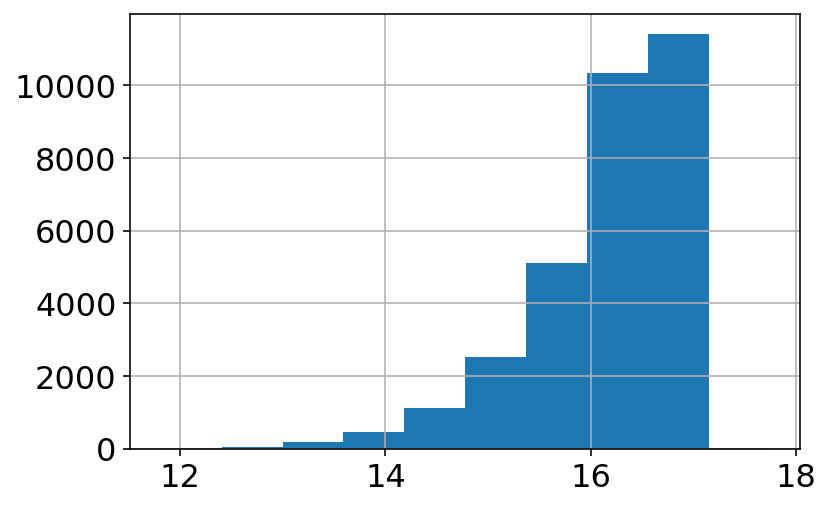

In [7]:
df['dered_r'].hist()

In [8]:
tag = 'dered_r'
#bins = np.linspace(df[tag].min(), df[tag].max(),12)
bins = np.array([11.8, 12.5, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.2, 17.8])
#bins = np.array([11.8, 12.5, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.8])
binCenter = (bins[0:-1]+bins[1:])/2.
print(bins)

[11.8 12.5 13.5 14.  14.5 15.  15.5 16.  16.5 17.2 17.8]


In [9]:
data_cut=pd.cut(df['dered_r'], bins)
grp = df.groupby(by = data_cut)

In [10]:
grp.mean()

,GalaxyID,class,pred_vit,pred_res,vitTresT,vitTresF,vitFresT,vitFresF,dered_r,model_g_r,petroR90_r,vitT,resT
dered_r,,,,,,,,,,,,,
"(11.8, 12.5]",134661.500000,2.750000,2.750000,2.750000,1.000000,0.000000,0.000000,0.000000,12.158540,0.805775,25.794505,1.000000,1.000000
"(12.5, 13.5]",135985.645714,2.274286,2.308571,2.382857,0.834286,0.045714,0.062857,0.057143,13.198382,0.811773,22.480652,0.880000,0.897143
"(13.5, 14.0]",129579.702970,2.567657,2.366337,2.498350,0.858086,0.016502,0.072607,0.052805,13.783081,0.805070,18.143034,0.874587,0.930693
"(14.0, 14.5]",132566.793210,2.484568,2.371914,2.464506,0.800926,0.029321,0.097222,0.072531,14.274395,0.802863,15.393697,0.830247,0.898148
"(14.5, 15.0]",137813.480226,2.551554,2.519068,2.548729,0.823446,0.026130,0.094633,0.055791,14.780789,0.783672,12.909738,0.849576,0.918079
"(15.0, 15.5]",139979.719829,2.478463,2.423360,2.459061,0.806364,0.032208,0.079938,0.081490,15.277457,0.793409,10.906650,0.838572,0.886302
"(15.5, 16.0]",141807.821745,2.483565,2.412347,2.445217,0.791825,0.029920,0.091867,0.086389,15.776183,0.798027,9.175188,0.821745,0.883692
"(16.0, 16.5]",142839.912846,2.474390,2.347684,2.361918,0.773889,0.035818,0.087154,0.103138,16.275280,0.821854,7.740641,0.809707,0.861043
"(16.5, 17.2]",141225.763265,2.495369,2.323548,2.355573,0.741130,0.040188,0.083438,0.135243,16.744226,0.823110,6.706134,0.781319,0.824568


In [11]:
grp.describe()

GalaxyID                                                  \
                count           mean           std      min       25%   
dered_r                                                                 
(11.8, 12.5]      4.0  134661.500000  96883.324174  25489.0  71049.25   
(12.5, 13.5]    175.0  135985.645714  73108.808099    664.0  85589.00   
(13.5, 14.0]    303.0  129579.702970  76788.122259   2599.0  69810.00   
(14.0, 14.5]    648.0  132566.793210  78569.138555    743.0  67007.00   
(14.5, 15.0]   1416.0  137813.480226  78577.672657    480.0  71385.00   
(15.0, 15.5]   2577.0  139979.719829  79601.595830     49.0  75032.00   
(15.5, 16.0]   4746.0  141807.821745  80451.925168    349.0  72127.00   
(16.0, 16.5]   8571.0  142839.912846  81735.680040     17.0  73036.50   
(16.5, 17.2]  12740.0  141225.763265  82255.972338     24.0  70280.75   
(17.2, 17.8]     11.0  153666.909091  64185.794437  71152.0  94087.50   

                                               class            ... vitT       \
                   50%        75%       max    count      mean  ...  75%  max   
dered_r                                                         ...             
(11.8, 12.5]  136261.0  199873.25  240635.0      4.0  2.750000  ...  1.0  1.0   
(12.5, 13.5]  130412.0  191952.00  294040.0    175.0  2.274286  ...  1.0  1.0   
(13.5, 14.0]  127169.0  185750.50  294774.0    303.0  2.567657  ...  1.0  1.0   
(14.0, 14.5]  129339.0  189190.25  295057.0    648.0  2.484568  ...  1.0  1.0   
(14.5, 15.0]  137317.5  204725.25  295283.0   1416.0  2.551554  ...  1.0  1.0   
(15.0, 15.5]  137775.0  205886.00  295259.0   2577.0  2.478463  ...  1.0  1.0   
(15.5, 16.0]  141768.5  211346.75  295209.0   4746.0  2.483565  ...  1.0  1.0   
(16.0, 16.5]  140901.0  213661.50  295236.0   8571.0  2.474390  ...  1.0  1.0   
(16.5, 17.2]  138817.5  213670.25  295237.0  12740.0  2.495369  ...  1.0  1.0   
(17.2, 17.8]  164182.0  187297.50  264131.0     11.0  5.090909  ...  1.0  1.0   

                 resT                                               
                count      mean       std  min  25%  50%  75%  max  
dered_r                                                             
(11.8, 12.5]      4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
(12.5, 13.5]    175.0  0.897143  0.304644  0.0  1.0  1.0  1.0  1.0  
(13.5, 14.0]    303.0  0.930693  0.254395  0.0  1.0  1.0  1.0  1.0  
(14.0, 14.5]    648.0  0.898148  0.302687  0.0  1.0  1.0  1.0  1.0  
(14.5, 15.0]   1416.0  0.918079  0.274341  0.0  1.0  1.0  1.0  1.0  
(15.0, 15.5]   2577.0  0.886302  0.317506  0.0  1.0  1.0  1.0  1.0  
(15.5, 16.0]   4746.0  0.883692  0.320628  0.0  1.0  1.0  1.0  1.0  
(16.0, 16.5]   8571.0  0.861043  0.345922  0.0  1.0  1.0  1.0  1.0  
(16.5, 17.2]  12740.0  0.824568  0.380351  0.0  1.0  1.0  1.0  1.0  
(17.2, 17.8]     11.0  0.363636  0.504525  0.0  0.0  0.0  1.0  1.0  

[10 rows x 104 columns]

In [12]:
df_bin=grp['dered_r','vitT','resT'].agg(['mean', 'std', 'count'])

<ipython-input-12-dc8a46431c87>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bin=grp['dered_r','vitT','resT'].agg(['mean', 'std', 'count'])


In [13]:
df_bin

dered_r                       vitT                       resT  \
                   mean       std  count      mean       std  count      mean   
dered_r                                                                         
(11.8, 12.5]  12.158540  0.279686      4  1.000000  0.000000      4  1.000000   
(12.5, 13.5]  13.198382  0.245006    175  0.880000  0.325894    175  0.897143   
(13.5, 14.0]  13.783081  0.138222    303  0.874587  0.331734    303  0.930693   
(14.0, 14.5]  14.274395  0.150181    648  0.830247  0.375706    648  0.898148   
(14.5, 15.0]  14.780789  0.140063   1416  0.849576  0.357613   1416  0.918079   
(15.0, 15.5]  15.277457  0.143102   2577  0.838572  0.367997   2577  0.886302   
(15.5, 16.0]  15.776183  0.143405   4746  0.821745  0.382768   4746  0.883692   
(16.0, 16.5]  16.275280  0.143408   8571  0.809707  0.392555   8571  0.861043   
(16.5, 17.2]  16.744226  0.139208  12740  0.781319  0.413368  12740  0.824568   
(17.2, 17.8]  17.378950  0.164992     11  0.545455  0.522233     11  0.363636   

                               
                   std  count  
dered_r                        
(11.8, 12.5]  0.000000      4  
(12.5, 13.5]  0.304644    175  
(13.5, 14.0]  0.254395    303  
(14.0, 14.5]  0.302687    648  
(14.5, 15.0]  0.274341   1416  
(15.0, 15.5]  0.317506   2577  
(15.5, 16.0]  0.320628   4746  
(16.0, 16.5]  0.345922   8571  
(16.5, 17.2]  0.380351  12740  
(17.2, 17.8]  0.504525     11

In [14]:
mag_r_avg = np.array(df_bin['dered_r']['mean'])
acc_vit = list(df_bin['vitT']['mean'])
acc_res = list(df_bin['resT']['mean'])

err_acc_vit = list(df_bin['vitT']['std'])/np.sqrt(df_bin['dered_r']['count'])
err_acc_res = list(df_bin['resT']['std'])/np.sqrt(df_bin['dered_r']['count'])

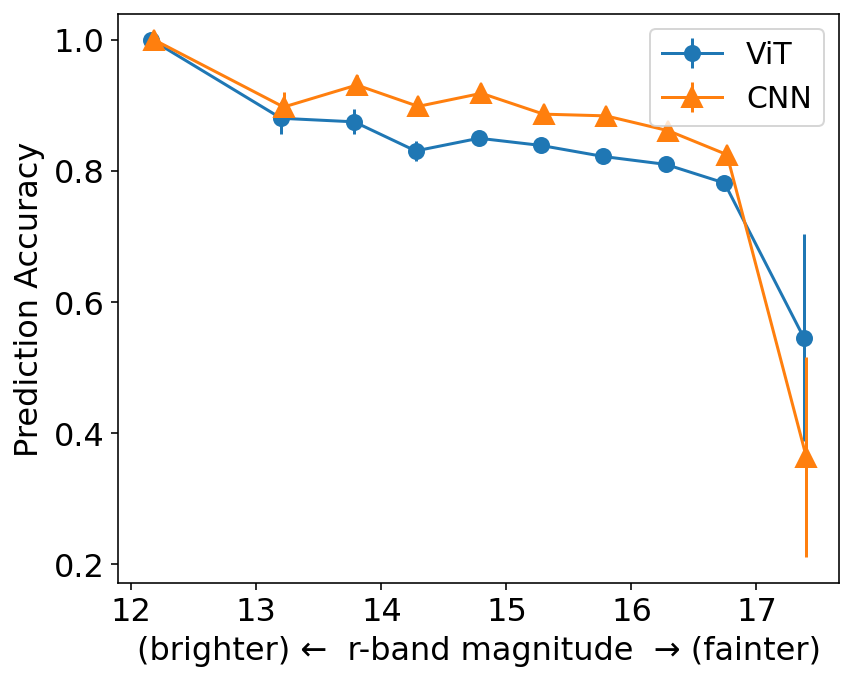

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6.2, 5.))
plt.rc('font',size=16)

#ax.plot(mag_r_avg, acc_vit, marker = '.', markersize=15, label='ViT')
#ax.plot(mag_r_avg, acc_res, marker = '^', markersize=10, label='CNN')
ax.errorbar(mag_r_avg, acc_vit, yerr=err_acc_vit , marker = '.', markersize=15, label='ViT')
ax.errorbar(mag_r_avg+0.02, acc_res, yerr=err_acc_res, marker = '^', markersize=10, label='CNN')


ax.set_xlabel('(brighter) ←  r-band magnitude  → (fainter)')
ax.set_ylabel('Prediction Accuracy')

ax.legend(fontsize=15)
plt.tight_layout()

### groupby : perto_R90

<AxesSubplot:>

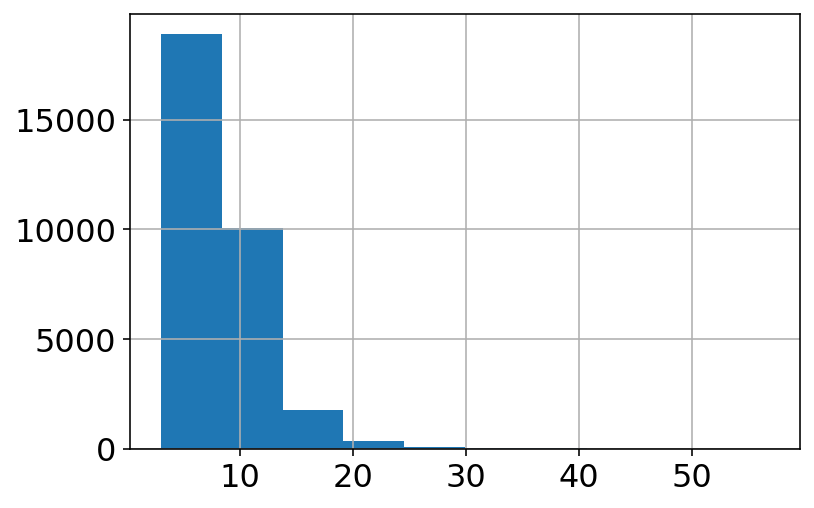

In [16]:
tag = 'petroR90_r'
df[tag].hist()

In [17]:
#bins = np.linspace(df[tag].min(), df[tag].max(),6)
bins = np.array([2.5, 3.2, 4.,5.,6.,60.])
binCenter = (bins[0:-1]+bins[1:])/2.
print(bins)

[ 2.5  3.2  4.   5.   6.  60. ]


In [18]:
data_cut = pd.cut(df[tag], bins)
grp = df.groupby(by=data_cut)
df_bin2 = grp[tag,'vitT','resT'].agg(['mean', 'std', 'count'])

<ipython-input-18-4374483392a3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bin2 = grp[tag,'vitT','resT'].agg(['mean', 'std', 'count'])


In [19]:
df_bin2

petroR90_r                       vitT                       resT  \
                  mean       std  count      mean       std  count      mean   
petroR90_r                                                                     
(2.5, 3.2]    3.110608  0.054460     69  0.884058  0.322501     69  0.884058   
(3.2, 4.0]    3.696570  0.215142    754  0.844828  0.362309    754  0.889920   
(4.0, 5.0]    4.565549  0.282672   2517  0.824791  0.380221   2517  0.853000   
(5.0, 6.0]    5.529475  0.283231   4406  0.796414  0.402710   4406  0.829097   
(6.0, 60.0]   9.491417  3.380765  23445  0.803668  0.397231  23445  0.859885   

                              
                  std  count  
petroR90_r                    
(2.5, 3.2]   0.322501     69  
(3.2, 4.0]   0.313197    754  
(4.0, 5.0]   0.354177   2517  
(5.0, 6.0]   0.376467   4406  
(6.0, 60.0]  0.347114  23445

In [20]:
xbin_avg = np.array(df_bin2[tag]['mean'])
acc_vit = list(df_bin2['vitT']['mean'])
acc_res = list(df_bin2['resT']['mean'])

err_acc_vit = list(df_bin2['vitT']['std'])/np.sqrt(df_bin2[tag]['count'])
err_acc_res = list(df_bin2['resT']['std'])/np.sqrt(df_bin2[tag]['count'])

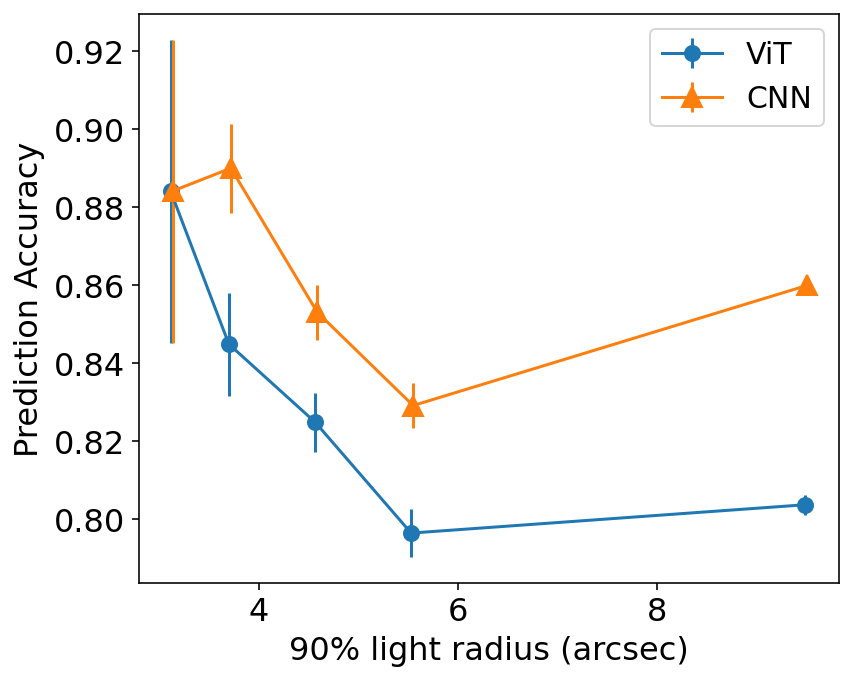

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6.2, 5.))
plt.rc('font',size=16)

#ax.plot(xbin_avg, acc_vit, marker = '.', markersize=15, label='ViT')
#ax.plot(xbin_avg, acc_res, marker = '^', markersize=10, label='CNN')
ax.errorbar(xbin_avg, acc_vit, yerr=err_acc_vit , marker = '.', markersize=15, label='ViT')
ax.errorbar(xbin_avg+0.02, acc_res, yerr=err_acc_res, marker = '^', markersize=10, label='CNN')

ax.set_xlabel('90% light radius (arcsec)')
ax.set_ylabel('Prediction Accuracy')

ax.legend(fontsize=15)
plt.tight_layout()

# ------ End ------

In [22]:
df['dered_r_binned'] = pd.cut(df[tag], bins, labels=binCenter)
df.head()[:][['GalaxyID','dered_r', 'dered_r_binned', 'class', 'pred_vit', 'pred_res', 'vitT', 'resT']]

,GalaxyID,dered_r,dered_r_binned,class,pred_vit,pred_res,vitT,resT
0,17,16.448505,33.0,0,0,0,1,1
1,20,16.261217,33.0,1,1,1,1,1
2,24,16.709976,5.5,3,3,3,1,1
3,36,16.950258,33.0,5,5,7,1,0
4,49,15.065980,33.0,3,3,3,1,1


In [23]:
col = 'dered_r_binned'
df_binned = df.groupby([col])[col].agg('count').to_frame('count').reset_index()
df_binned

,dered_r_binned,count
0,2.85,69
1,3.60,754
2,4.50,2517
3,5.50,4406
4,33.00,23445


In [24]:
df_binned['acc_vit'] = /df_stats['count']

SyntaxError: invalid syntax (<ipython-input-24-c69a03dacd0b>, line 1)

In [ ]:
df_stats['full'] = df_stats['count']/df_stats['count'].sum()

In [ ]:
df.groupby([col])[col].agg('count').to_frame('count')